In [1]:
import os

source_path = 'C:\\Users\\sumey\\Downloads\\kaggle.json'
print(f"File exists: {os.path.isfile(source_path)}")


File exists: True


In [2]:
import os
import shutil

# Define the source and destination paths
source_path = r'C:\Users\sumey\Downloads\kaggle.json'
destination_dir = os.path.expanduser('~/.kaggle')
destination_path = os.path.join(destination_dir, 'kaggle.json')

# Check if source file exists
if not os.path.isfile(source_path):
    raise FileNotFoundError(f"The source file does not exist: {source_path}")

# Create the .kaggle directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Check if the file already exists in the destination directory
if not os.path.isfile(destination_path):
    # Copy the kaggle.json file to the .kaggle directory
    shutil.copy(source_path, destination_path)
    print(f'kaggle.json has been copied to {destination_path}')
else:
    print(f'kaggle.json already exists in {destination_path}. Skipping copy.')

kaggle.json already exists in C:\Users\sumey/.kaggle\kaggle.json. Skipping copy.


In [3]:
!pip install kaggle


In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia 

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
... resuming from 146800640 bytes (2316564795 bytes left) ...




  6%|▌         | 140M/2.29G [00:00<?, ?B/s]
  6%|▌         | 141M/2.29G [00:02<1:13:51, 523kB/s]
  6%|▌         | 142M/2.29G [00:02<45:39, 845kB/s]  
  6%|▌         | 143M/2.29G [00:03<35:59, 1.07MB/s]
  6%|▌         | 144M/2.29G [00:04<31:59, 1.20MB/s]
  6%|▌         | 145M/2.29G [00:04<26:06, 1.48MB/s]
  6%|▌         | 146M/2.29G [00:04<20:59, 1.83MB/s]
  6%|▋         | 147M/2.29G [00:05<17:54, 2.15MB/s]
  6%|▋         | 148M/2.29G [00:05<15:54, 2.42MB/s]
  6%|▋         | 149M/2.29G [00:05<14:45, 2.60MB/s]
  6%|▋         | 150M/2.29G [00:06<13:34, 2.83MB/s]
  6%|▋         | 151M/2.29G [00:06<13:45, 2.79MB/s]
  6%|▋         | 152M/2.29G [00:06<13:09, 2.92MB/s]
  7%|▋         | 153M/2.29G [00:07<11:47, 3.26MB/s]
  7%|▋         | 154M/2.29G [00:07<11:23, 3.37MB/s]
  7%|▋         | 155M/2.29G [00:07<12:04, 3.18MB/s]
  7%|▋         | 156M/2.29G [00:08<13:04, 2.93MB/s]
  7%|▋         | 157M/2.29G [00:08<11:48, 3.25MB/s]
  7%|▋         | 158M/2.29G [00:08<10:54, 3.51MB/s]
  7%|▋         | 

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'chest-xray-pneumonia.zip'

In [5]:
import zipfile

# Path to the zip file
zip_file_path = './chest-xray-pneumonia.zip'

# Directory where you want to extract the files
output_directory = './chest_xray'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_directory)

print(f"Files successfully extracted to {output_directory}")


Files successfully extracted to ./chest_xray


Contents of base directory: ['chest_xray', 'test', 'train', 'val', '__MACOSX']
Contents of training directory: ['NORMAL', 'PNEUMONIA']
Contents of testing directory: ['NORMAL', 'PNEUMONIA']
Contents of validation directory: ['NORMAL', 'PNEUMONIA']
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Output structure of the dataset: <class 'tuple'> 2
Shape of images: (8, 256, 256, 3)
Shape of labels: (8,)
Shape of images: (8, 256, 256, 3)


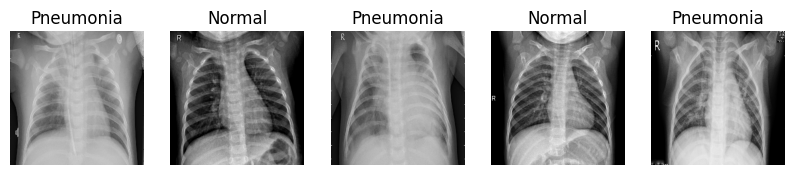

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base directory
base_dir = r'C:\Users\sumey\Desktop\visual_projects\cycleGAN_for_detection_of_pnumonia\notebooks\chest_xray\chest_xray'



# List contents of the base directory
print("Contents of base directory:", os.listdir(base_dir))

# Define paths for training, testing, and validation datasets
train_dir = os.path.join(base_dir, r'train')
test_dir = os.path.join(base_dir, r'test')
val_dir = os.path.join(base_dir, r'val')

# Verify the contents of each directory
print("Contents of training directory:", os.listdir(train_dir))
print("Contents of testing directory:", os.listdir(test_dir))
print("Contents of validation directory:", os.listdir(val_dir))

# Define the strategy for distributed training, if applicable
strategy = tf.distribute.MirroredStrategy()

# Set image size and other hyperparameters
BUFFER_SIZE = 1000
BATCH_SIZE = 8  # Batch size for distributed training
EPOCHS = 1
latent_dim = 128
input_size = [256, 256, 3]  # 512x512 GRAY images
image_size = (256, 256)  # Size for resizing images

# Initialize ImageDataGenerator for data preprocessing
# Initialize ImageDataGenerator for data preprocessing without validation_split
train_datagen = ImageDataGenerator( rescale=1./255 , validation_split=0.2 ) # Split the dataset )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# For training dataset
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Include labels
    shuffle=True,
    subset='training'
)

# For validation dataset
val_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Include labels
    shuffle=True,
    subset='validation'
)
# Load test dataset
test_dataset = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Typically set to False for test data
)

# Check the output of the dataset
first_batch = next(train_dataset)  # Get the next batch of images and labels
print("Output structure of the dataset:", type(first_batch), len(first_batch))

# Print the shape of images and labels
images, labels = first_batch
print("Shape of images:", images.shape)  # Should be (batch_size, height, width, channels)
print("Shape of labels:", labels.shape)  # Should be (batch_size,)

def visualize_data(dataset, num_images=5):
    plt.figure(figsize=(10, 5))

    # Get one batch of images and labels from the dataset
    images, labels = next(dataset)  # Get the next batch of images and labels

    # Check the shape of the returned images
    print("Shape of images:", images.shape)  # Should be (batch_size, height, width, channels)

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])  # Display image
        plt.title('Pneumonia' if labels[i] == 1 else 'Normal')  # Set title based on label
        plt.axis('off')

    plt.show()

# Visualizing a few images from the training dataset
visualize_data(train_dataset, num_images=5)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator():
    inputs = layers.Input(shape=(256, 256, 3))

    # Encoder
    x = layers.Conv2D(64, kernel_size=7, strides=1, padding='same')(inputs)
    x = layers.ReLU()(x)

    # Downsampling
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, kernel_size=3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)

    # Bottleneck
    for _ in range(9):
        res = x
        x = layers.Conv2D(256, kernel_size=3, padding='same')(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(256, kernel_size=3, padding='same')(x)
        x = layers.add([x, res])  # Residual connection

    # Upsampling
    x = layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)
    x = layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same')(x)
    x = layers.ReLU()(x)

    outputs = layers.Conv2D(3, kernel_size=7, padding='same', activation='tanh')(x)

    return tf.keras.Model(inputs, outputs)

def build_discriminator():
    inputs = layers.Input(shape=(256, 256, 3))
    x = layers.Conv2D(64, kernel_size=4, strides=2, padding='same')(inputs)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv2D(128, kernel_size=4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv2D(256, kernel_size=4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Conv2D(512, kernel_size=4, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)

    return tf.keras.Model(inputs, outputs)

# Instantiate generators and discriminators
generator_G = build_generator()  # Normal to Pneumonia
generator_F = build_generator()  # Pneumonia to Normal
discriminator_X = build_discriminator()  # Normal images
discriminator_Y = build_discriminator()  # Pneumonia images


In [4]:
# Define loss functions
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(fake_output):
    return loss_object(tf.ones_like(fake_output), fake_output)

def discriminator_loss(real_output, fake_output):
    real_loss = loss_object(tf.ones_like(real_output), real_output)
    fake_loss = loss_object(tf.zeros_like(fake_output), fake_output)
    return (real_loss + fake_loss) * 0.5

def cycle_loss(real_image, cycled_image, lambda_cycle=10):
    return lambda_cycle * tf.reduce_mean(tf.abs(real_image - cycled_image))

# Define optimizers
generator_G_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_F_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_X_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_Y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [ ]:
import time

@tf.function
def train_step(real_x, real_y):
    start_time = time.time()
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X to Y
        fake_y = generator_G(real_x)
        cycled_x = generator_F(fake_y)  # Translate Y back to X

        # Generator F translates Y to X
        fake_x = generator_F(real_y)
        cycled_y = generator_G(fake_x)  # Translate X back to Y

        # Discriminator output
        disc_real_x = discriminator_X(real_x)
        disc_real_y = discriminator_Y(real_y)
        disc_fake_x = discriminator_X(fake_x)
        disc_fake_y = discriminator_Y(fake_y)

        # Calculate the loss
        gen_G_loss = generator_loss(disc_fake_y)
        gen_F_loss = generator_loss(disc_fake_x)
        total_cycle_loss = cycle_loss(real_x, cycled_x) + cycle_loss(real_y, cycled_y)

        # Total generator loss
        total_gen_G_loss = gen_G_loss + total_cycle_loss
        total_gen_F_loss = gen_F_loss + total_cycle_loss

        # Discriminator loss
        disc_X_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_Y_loss = discriminator_loss(disc_real_y, disc_fake_y)

    # Calculate the gradients
    generator_G_gradients = tape.gradient(total_gen_G_loss, generator_G.trainable_variables)
    generator_F_gradients = tape.gradient(total_gen_F_loss, generator_F.trainable_variables)
    discriminator_X_gradients = tape.gradient(disc_X_loss, discriminator_X.trainable_variables)
    discriminator_Y_gradients = tape.gradient(disc_Y_loss, discriminator_Y.trainable_variables)

    # Apply the gradients to the optimizers
    generator_G_optimizer.apply_gradients(zip(generator_G_gradients, generator_G.trainable_variables))
    generator_F_optimizer.apply_gradients(zip(generator_F_gradients, generator_F.trainable_variables))
    discriminator_X_optimizer.apply_gradients(zip(discriminator_X_gradients, discriminator_X.trainable_variables))
    discriminator_Y_optimizer.apply_gradients(zip(discriminator_Y_gradients, discriminator_Y.trainable_variables))
    end_time = time.time()
    print(f"Training step took {end_time - start_time:.2f} seconds.")
    
    return total_gen_G_loss, total_gen_F_loss, disc_X_loss, disc_Y_loss, fake_x, fake_y


# Main training loop
EPOCHS = 1  # Define your number of epochs here

print(f"Number of batches in train dataset: {len(train_dataset)}")
print(f"Number of batches in validation dataset: {len(val_dataset)}")

for epoch in range(EPOCHS):
    start_time = time.time()
    print(f"Epoch {epoch + 1}/{EPOCHS} started")

    for batch, (real_x, real_y) in enumerate(zip(train_dataset, val_dataset)):
        print(f"Processing epoch {epoch + 1}, batch {batch}")  # Debugging print

        # Training step
        start_batch_time = time.time()
        
        # Print shapes of inputs for debugging
        print(f"Shape of real_x: {real_x[0].shape}, Shape of real_y: {real_y[0].shape}")

        total_gen_G_loss, total_gen_F_loss, disc_X_loss, disc_Y_loss, fake_x, fake_y = train_step(real_x[0], real_y[0])
        
        end_batch_time = time.time()

        # Print training progress every 10 batches
        if batch % 10 == 0:
            print(f"Epoch {epoch + 1}, Batch {batch}, Time for batch: {end_batch_time - start_batch_time:.2f} seconds")
            print(f"Generator G Loss: {total_gen_G_loss:.4f}, Generator F Loss: {total_gen_F_loss:.4f}, Discriminator X Loss: {disc_X_loss:.4f}, Discriminator Y Loss: {disc_Y_loss:.4f}")

    print(f"Total batches processed in epoch {epoch + 1}: {batch + 1}")

print(f"Training completed for {EPOCHS} epochs.")


Number of batches in train dataset: 522
Number of batches in validation dataset: 131
Epoch 1/1 started
Processing epoch 1, batch 0
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Training step took 6.84 seconds.
Training step took 3.42 seconds.
Epoch 1, Batch 0, Time for batch: 78.99 seconds
Generator G Loss: 10.2717, Generator F Loss: 10.2696, Discriminator X Loss: 0.6907, Discriminator Y Loss: 0.6971
Processing epoch 1, batch 1
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Processing epoch 1, batch 2
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Processing epoch 1, batch 3
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Processing epoch 1, batch 4
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Processing epoch 1, batch 5
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256, 256, 3)
Processing epoch 1, batch 6
Shape of real_x: (8, 256, 256, 3), Shape of real_y: (8, 256,